### Elastic Net & Nested Cross-Validation

1. Using the diabetes.csv dataset, train a logistic regression model with elastic net penalization to demonstrate the pros and cons of the different data splitting methods and give a short description on what you observe.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


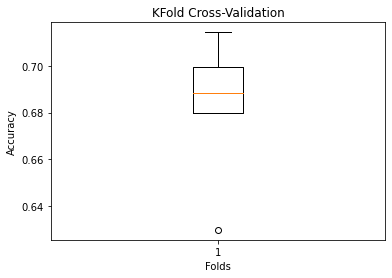

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Split the features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# a) Using KFold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True)

accuracy_scores_kfold = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create and train the logistic regression model
    model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)  # Set a valid l1_ratio value
    model.fit(X_train, y_train)
    
    # Predict on the test set and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_kfold.append(accuracy)

# Plot the boxplot for KFold cross-validation
plt.boxplot(accuracy_scores_kfold)
plt.title("KFold Cross-Validation")
plt.xlabel("Folds")
plt.ylabel("Accuracy")
plt.show()



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


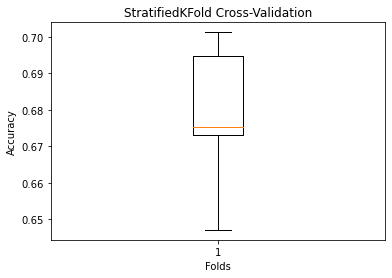

In [2]:
# b) Using StratifiedKFold cross-validation with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True)

accuracy_scores_skfold = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create and train the logistic regression model
    model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
    model.fit(X_train, y_train)
    
    # Predict on the test set and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_skfold.append(accuracy)

# Plot the boxplot for StratifiedKFold cross-validation
plt.boxplot(accuracy_scores_skfold)
plt.title("StratifiedKFold Cross-Validation")
plt.xlabel("Folds")
plt.ylabel("Accuracy")
plt.show()



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter 

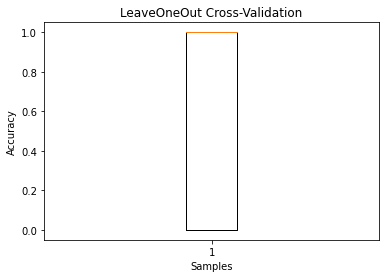

In [3]:
# c) Using LeaveOneOut cross-validation
loo = LeaveOneOut()

accuracy_scores_loocv = []
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create and train the logistic regression model
    model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
    model.fit(X_train, y_train)
    
    # Predict on the test set and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_loocv.append(accuracy)

# Plot the boxplot for LeaveOneOut cross-validation
plt.boxplot(accuracy_scores_loocv)
plt.title("LeaveOneOut Cross-Validation")
plt.xlabel("Samples")
plt.ylabel("Accuracy")
plt.show()


2. Use the nested cross validation to train a logistic regression with elastic net penalization (schizophrenia.tsv)

Index(['Unnamed: 0'], dtype='object')


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter 

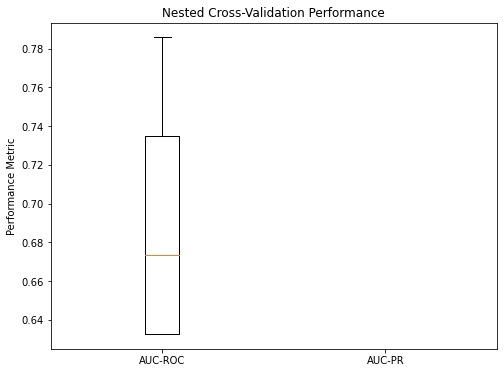

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, average_precision_score
import matplotlib.pyplot as plt

# Load the feature data and class labels
feature_data = pd.read_csv('schizophrenia_data.tsv', sep='\t')
class_labels = pd.read_csv('schizophrenia_labels.tsv', sep='\t')

# Identify any non-numeric columns in the feature data
non_numeric_columns = feature_data.select_dtypes(exclude=np.number).columns
print(non_numeric_columns)

# Remove non-numeric columns from the feature data
feature_data = feature_data.drop(non_numeric_columns, axis=1)

# Preprocess the data by separating the features (X) and the class labels (y)
X = feature_data.values
y = class_labels['Target'].values

# Perform nested cross-validation to optimize hyperparameters and evaluate the model
logreg = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=100)
param_grid = {'C': np.logspace(-3, 3, 7), 'l1_ratio': np.linspace(0, 1, 11)}
nested_cv = GridSearchCV(logreg, param_grid, scoring='roc_auc', cv=5)
auc_scores = cross_val_score(nested_cv, X, y, scoring='roc_auc', cv=5)
auc_pr_scores = cross_val_score(nested_cv, X, y, scoring='average_precision', cv=5)

# Plot boxplots for AUC-ROC and AUC-PR scores
plt.figure(figsize=(8, 6))
plt.boxplot([auc_scores, auc_pr_scores], labels=['AUC-ROC', 'AUC-PR'])
plt.title("Nested Cross-Validation Performance")
plt.ylabel("Performance Metric")
plt.show()
